In [1]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

<font color='green'>
### 1

In [2]:
df_AB = pd.read_csv('ab_browser_test.csv', sep=',')

In [3]:
df_AB.tail()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
566129,603133,Browser #14,control,1,2,1
566130,603134,Browser #2,exp,4,2,0
566131,603135,Browser #4,control,0,1,1
566132,603136,Browser #4,control,2,3,1
566133,603137,Browser #2,exp,3,1,0


In [4]:
n_exp = float(df_AB[df_AB['slot']=='exp'].n_clicks.sum())

In [5]:
n_control = float(df_AB[df_AB['slot']=='control'].n_clicks.sum())

In [6]:
print (n_exp-n_control)/n_control * 100

1.61356898244


<font color='green'>
### 2

In [27]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

clicks_exp = df_AB[df_AB.slot == 'exp'].n_clicks.values
clicks_control = df_AB[df_AB.slot == 'control'].n_clicks.values

clicks_exp_mean_scores = map(np.mean, get_bootstrap_samples(clicks_exp, 500))
clicks_control_mean_scores = map(np.mean, get_bootstrap_samples(clicks_control, 500))

clicks_exp_median_scores = map(np.median, get_bootstrap_samples(clicks_exp, 500))
clicks_control_median_scores = map(np.median, get_bootstrap_samples(clicks_control, 500))

delta_mean_scores = map(lambda x: x[1] - x[0], zip(clicks_exp_mean_scores, clicks_control_mean_scores))
delta_median_scores = map(lambda x: x[1] - x[0], zip(clicks_exp_median_scores, clicks_control_median_scores))

print "95% confidence interval for the difference between means",  stat_intervals(delta_mean_scores, 0.05)
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between means [-0.41265216 -0.2007176 ]
95% confidence interval for the difference between medians [-1. -1.]


<font color='green'>
### 3

- Все ответы неверны

<font color='green'>
### 4

In [92]:
def solve4(data, n_boot_samples):
    indices = np.random.randint(0, len(data), (n_boot_samples, len(data)))
    samples = data[indices]
    means = [ np.mean(samples[i][:]) for i in xrange(samples.shape[0])]
    control_boot_chi_squared = []
    for i in xrange(samples.shape[0]):
        s = 0
        for j in xrange(samples.shape[1]):
            s += (samples[i][j] - means[i])**2
        control_boot_chi_squared.append(s)
    
    plt.figure()
    r1 = probplot(means, sparams=(samples.shape[1]-1), plot=plt)[1][2]
    print 'means:', r1**2
    plt.show()

    plt.figure()
    r2 = probplot(control_boot_chi_squared, dist='chi2', sparams=(samples.shape[1]-1), plot=plt)[1][2]
    print 'chi_squared:', r2**2
    plt.show()

In [93]:
np.random.seed(0)
n_boot_samples = 500

means: 0.995953774208


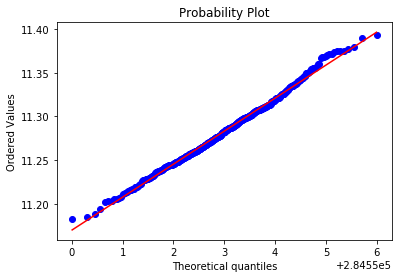

chi_squared: 0.996517416545


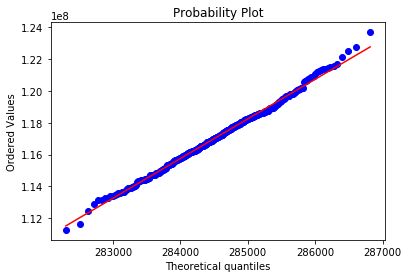

In [94]:
solve4(clicks_control, n_boot_samples)

- R2 для выборочного среднего получился больше, чем 0.99
- R2 для выборочной суммы квадратов отклонения от выборочной суммы получился больше, чем 0.99

<font color='green'>
### 5

- Получившееся значение достигаемого уровня значимости свидетельствует о статистической значимости отличий между двумя выборками

<font color='green'>
### 6

5

<font color='green'>
### 7

- С помощью анализа, проведенного в предыдущем вопросе, мы показали, что тестируемое изменение приводит к статистически значимому отличию только для одного браузера. Для этого браузера на основе данных о доли некликнутых запросов, заключаем, что тестируемое изменение влияет на пользователей позитивно.